# Proof of Value for applying same visual style between cmp_facade_dataset images and Nelissen target images (sketches)

## **CMP Facade Dataset "Complex" Preprocessing**

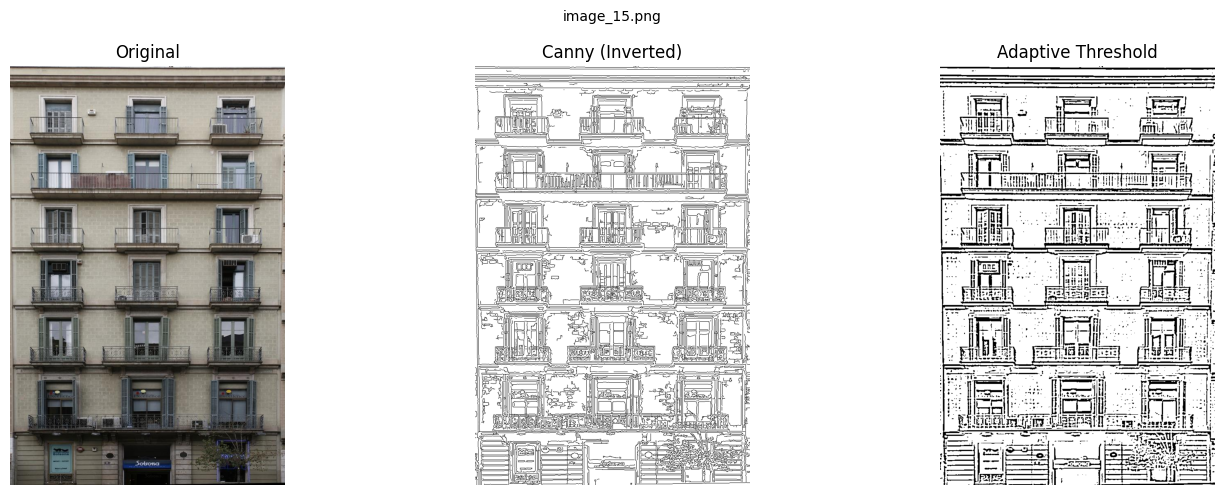

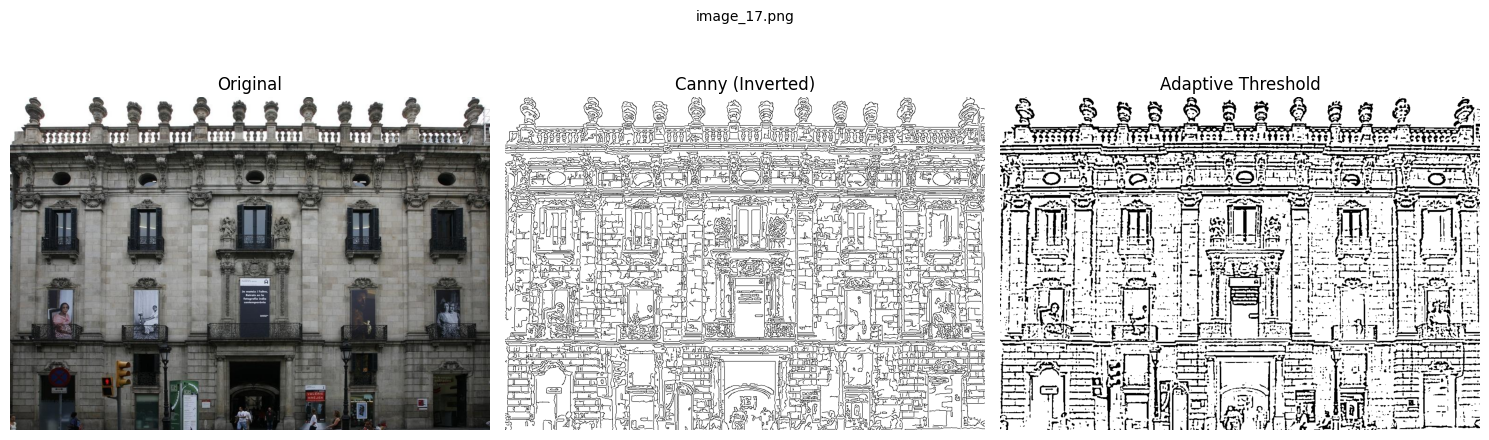

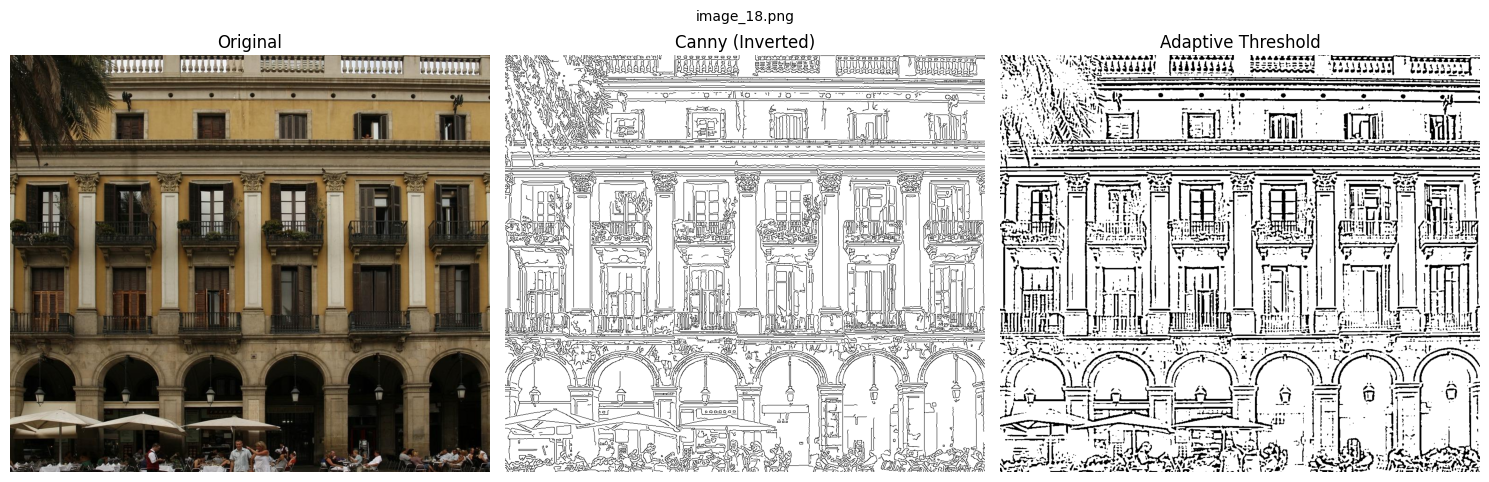

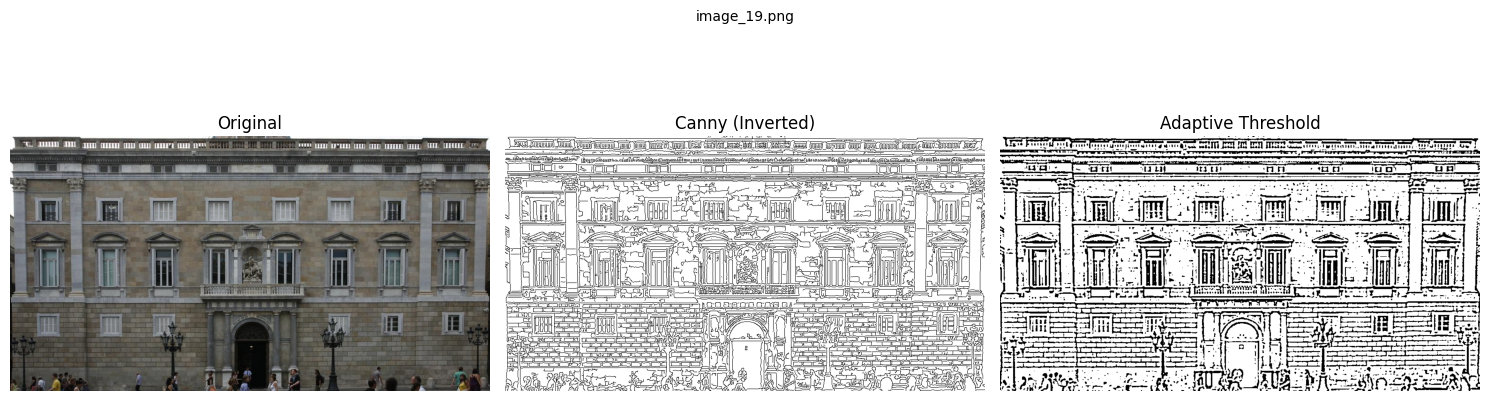

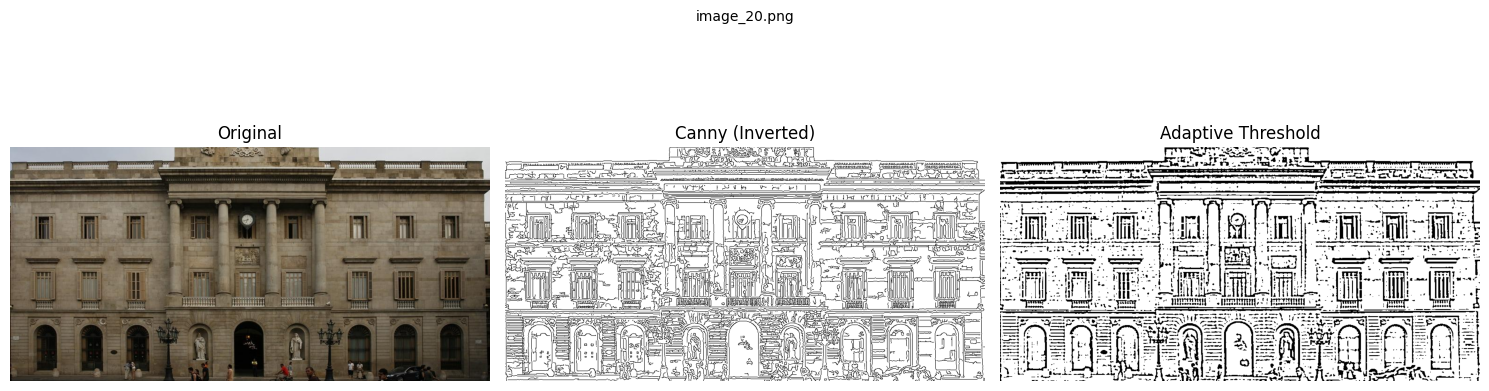

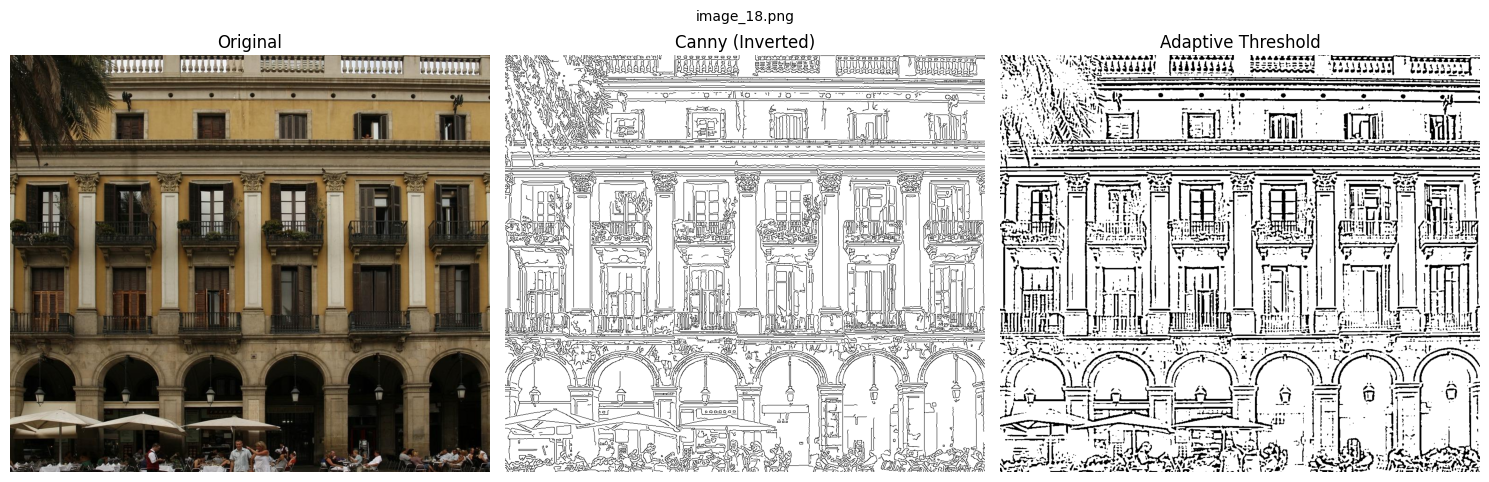

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '../data/cmp_facade_dataset/images/train/image_15.png',
    '../data/cmp_facade_dataset/images/train/image_17.png',
    '../data/cmp_facade_dataset/images/train/image_18.png',
    '../data/cmp_facade_dataset/images/train/image_19.png',
    '../data/cmp_facade_dataset/images/train/image_20.png',
    '../data/cmp_facade_dataset/images/train/image_18.png'
]

# Store results in a dictionary
cmpresults = {}

for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print(f"Failed to load: {path}")
        continue

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE to boost local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_eq = clahe.apply(gray)

    # Blur
    blurred = cv2.GaussianBlur(gray_eq, (5, 5), 0)

    # Improved Canny
    edges = cv2.Canny(blurred, 30, 100)
    sketch = cv2.bitwise_not(edges)

    # Adaptive threshold
    sketch1 = cv2.adaptiveThreshold(blurred, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 9, 10)

    # Optional morphological fix
    kernel = np.ones((2, 2), np.uint8)
    sketch1_morph = cv2.morphologyEx(sketch1, cv2.MORPH_CLOSE, kernel)


    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sketch, cmap='gray')
    plt.title('Canny (Inverted)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sketch1, cmap='gray')
    plt.title('Adaptive Threshold')
    plt.axis('off')

    plt.suptitle(path.split('/')[-1], fontsize=10)
    plt.tight_layout()
    plt.show()


## **Nelissen Preprocessing**

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


# List of image paths
image_paths = [
     r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 1 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5166.png"
]

# Store results in a dictionary
nelissenresults = {}

for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print(f"Failed to load: {path}")
        continue

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE to boost local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray_eq = clahe.apply(gray)

    # Blur
    blurred = cv2.GaussianBlur(gray_eq, (5, 5), 0)

    # Improved Canny
    edges = cv2.Canny(blurred, 30, 100)
    sketch = cv2.bitwise_not(edges)

    # Adaptive threshold
    sketch1 = cv2.adaptiveThreshold(blurred, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 9, 10)

    # Optional morphological fix
    kernel = np.ones((2, 2), np.uint8)
    sketch1_morph = cv2.morphologyEx(sketch1, cv2.MORPH_CLOSE, kernel)


    # Show results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sketch, cmap='gray')
    plt.title('Canny (Inverted)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sketch1, cmap='gray')
    plt.title('Adaptive Threshold')
    plt.axis('off')

    plt.suptitle(path.split('/')[-1], fontsize=10)
    plt.tight_layout()
    plt.show()


Failed to load: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 1 5166.png
Failed to load: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5148.png
Failed to load: C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5166.png


## **Comparison between processed Facade and Nelissen images**

KeyError: 'Facade Nelissen 2 5148.png'

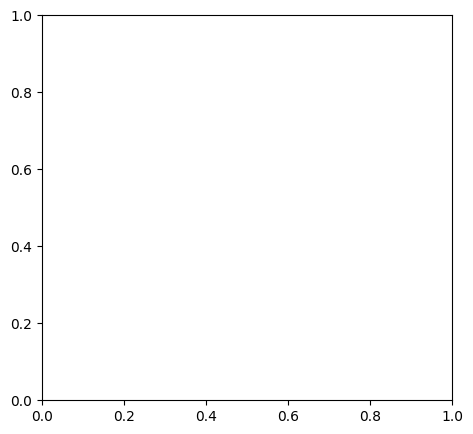

In [3]:
import matplotlib.pyplot as plt

# Pick the image keys
nelissen_key = "Facade Nelissen 2 5148.png"
cmp_key = "image_15.png"

# -- Canny comparison with original --
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(nelissenresults[nelissen_key]['original'], cv2.COLOR_BGR2RGB))
plt.title("Original - Nelissen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(nelissenresults[nelissen_key].get("canny_inverted", np.zeros((10, 10))), cmap='gray')
plt.title("Canny - Nelissen")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cmpresults[cmp_key].get("canny_inverted", np.zeros((10, 10))), cmap='gray')
plt.title("Canny - CMP")
plt.axis('off')

plt.suptitle("Canny Edge (Inverted) Comparison", fontsize=14)
plt.tight_layout()
plt.show()

# -- Adaptive threshold (optionally with morphology) with original --
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(nelissenresults[nelissen_key]['original'], cv2.COLOR_BGR2RGB))
plt.title("Original - Nelissen")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(nelissenresults[nelissen_key].get("adaptive_thresh", np.zeros((10, 10))), cmap='gray')
plt.title("Adaptive - Nelissen")
plt.axis('off')

plt.subplot(1, 3, 3)
adaptive_cmp = cmpresults[cmp_key].get("adaptive_thresh_morph") or cmpresults[cmp_key]["adaptive_thresh"]
plt.imshow(adaptive_cmp, cmap='gray')
plt.title("Adaptive - CMP")
plt.axis('off')

plt.suptitle("Adaptive Threshold Comparison", fontsize=14)
plt.tight_layout()
plt.show()

## **Conclusion:**

From the results, this preprocessing works quite well, especially on the Nelissen images. The Nelissen facades look clearer because all the parts are drawn properly, while in the CMP images some details are missing or harder to see — probably because of things like shadows or dirt in the photos.

Overall, adaptive thresholding seems to work a bit better than Canny, at least visually. Now it's up to the model to see which one actually performs better during training.

# **Only Greyscaling Preprocessing**

### **CMP Dataset**

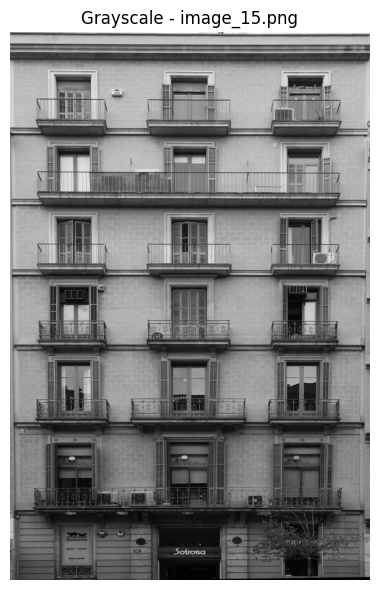

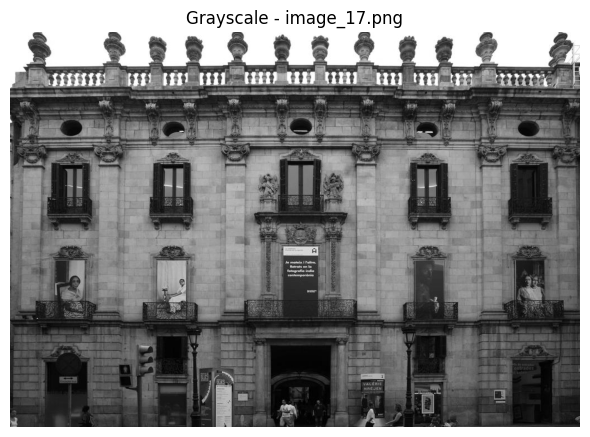

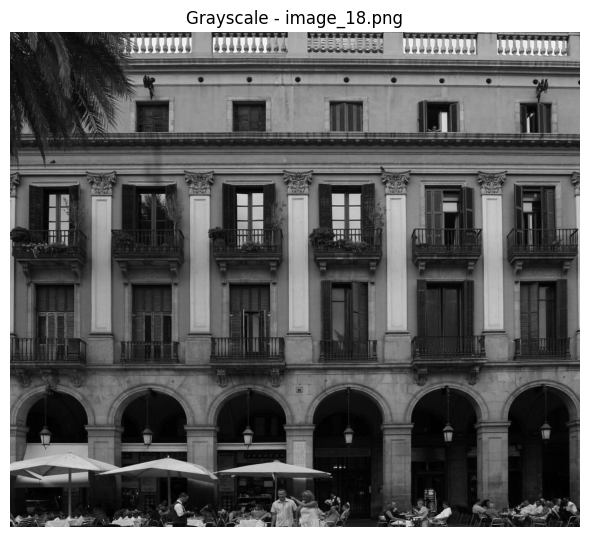

In [ ]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
    '../data/cmp_facade_dataset/images/train/image_15.png',
    '../data/cmp_facade_dataset/images/train/image_17.png',
    '../data/cmp_facade_dataset/images/train/image_18.png'
]

# Store results
cmpgreyresults = {}

for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print(f"Failed to load: {path}")
        continue

    # Convert to grayscale only
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Show grayscale image
    plt.figure(figsize=(6, 6))
    plt.imshow(gray, cmap='gray')
    plt.title(f"Grayscale - {path.split('/')[-1]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Save to dictionary
    name = path.split('/')[-1]
    cmpgreyresults[name] = {
        'original': image,
        'gray': gray
    }


### **Nelissen Data**


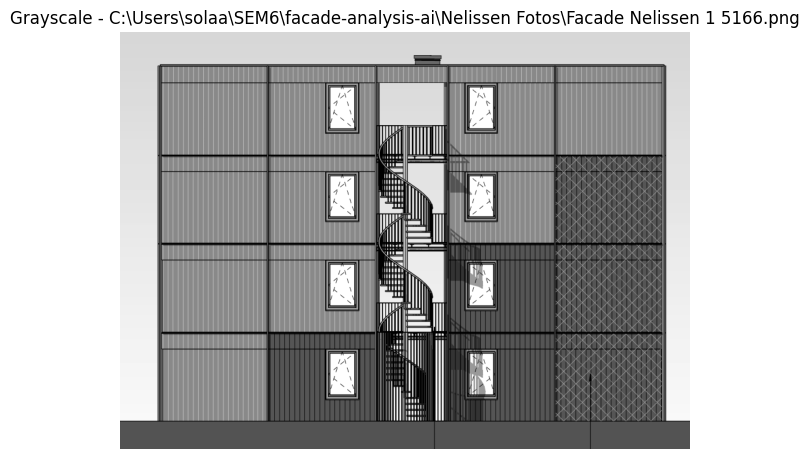

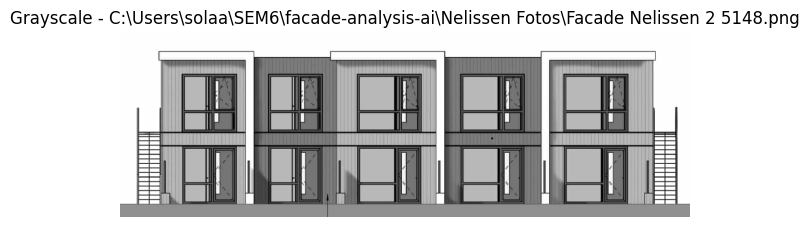

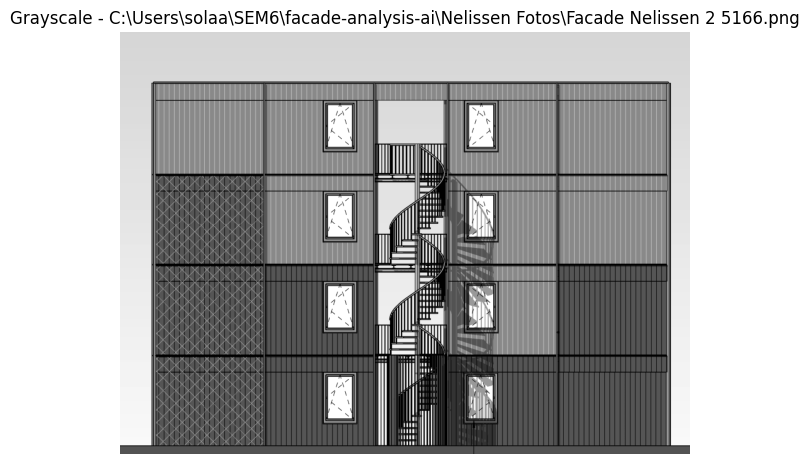

In [16]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = [
        r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 1 5166.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5148.png",
    r"C:\Users\solaa\SEM6\facade-analysis-ai\Nelissen Fotos\Facade Nelissen 2 5166.png"
]

# Store results
nelissengreyresults = {}

for path in image_paths:
    image = cv2.imread(path)
    if image is None:
        print(f"Failed to load: {path}")
        continue

    # Convert to grayscale only
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Show grayscale image
    plt.figure(figsize=(6, 6))
    plt.imshow(gray, cmap='gray')
    plt.title(f"Grayscale - {path.split('/')[-1]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Save to dictionary
    name = path.split('/')[-1]
    nelissengreyresults[name] = {
        'original': image,
        'gray': gray
    }
